In [1]:
import numpy as np
import matplotlib.pyplot as plt

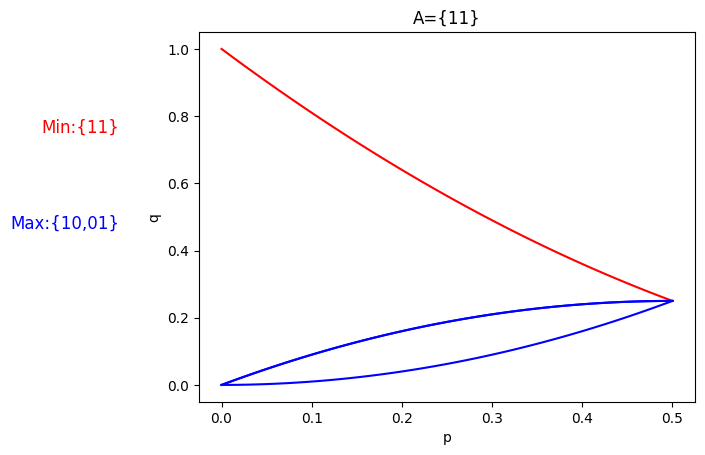

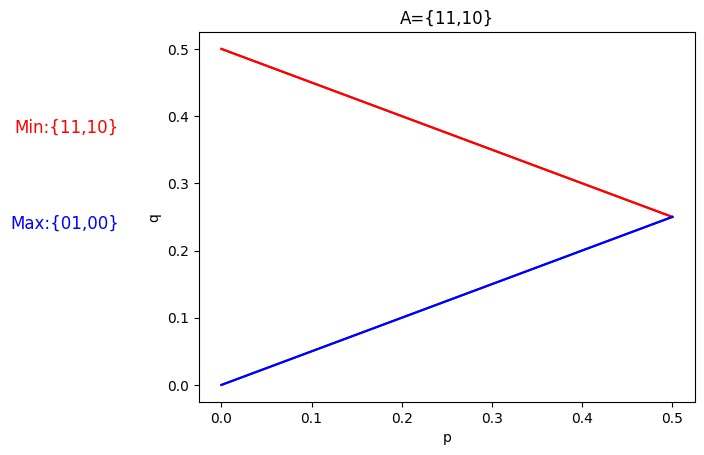

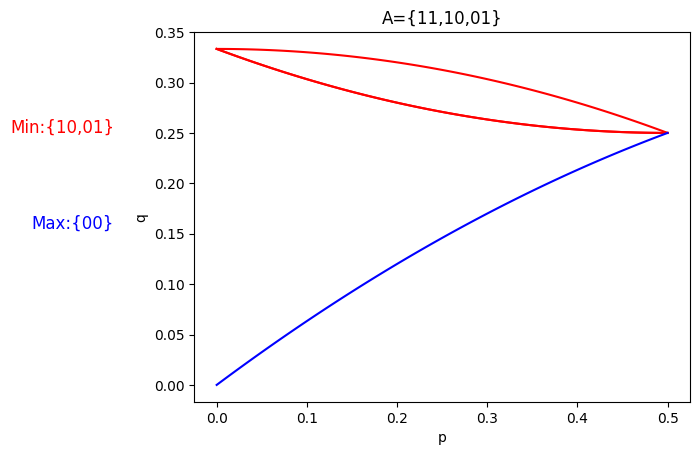

In [2]:
T=np.array([[1,1],[1,0],[0,1],[0,0]])
P = np.linspace(0, 0.5, 100)
def q_y(p,y,A):
  total=0
  for a in A:
    total+=p_y(p,y,a)
  return round(total/A.shape[0],10)
def p_y(p,y,a): 
  sum=1
  for i in range(a.shape[0]):
    if y[i]==a[i]:
      sum*=(1-p)
    else:
      sum*=p
  return sum

A = [
    np.array([[1,1]]),
    np.array([[1,1],[1,0]]),
    np.array([[1,1],[1,0],[0,1]])
]
B = []
for a in A:
    s = '{'
    for i,v in enumerate(a):
        if i != 0:
          s+=','
        s += ''.join(map(str, v))
    s += '}'
    B.append(s)

for b,a in enumerate(A):
  C=[]
  D=[]
  alpha=0
  beta=1
  plt.figure()
  for i in T:
    points=[]
    for p in P:
      points.append([p,q_y(p,i,a)])
    if points[0][1]==0:#blue
      if points[50][1]>alpha:
        alpha=points[50][1]
        C.clear()
        C.append(i)
      elif points[50][1]==alpha:
        C.append(i)
    else:#red
      if points[50][1]<beta:
        beta=points[50][1]
        D.clear()
        D.append(i)
      elif points[50][1]==beta:
        D.append(i)
    is_in = any((i == row).all() for row in a)
    if is_in:
      co='red'
    else:
      co='blue'
    x_c=[point[0] for point in points]
    y_c=[point[1] for point in points]
    plt.plot(x_c,y_c,color=co)
  D_str = '{' + ','.join([''.join(map(str, arr)) for arr in D]) + '}'
  C_str = '{' + ','.join([''.join(map(str, arr)) for arr in C]) + '}'
  plt.figtext(0, 0.7, f'Min:{D_str}', ha='right', va='top', fontsize=12, color='red')
  plt.figtext(0, 0.5, f'Max:{C_str}', ha='right', va='top', fontsize=12, color='blue')
  plt.title(f'A={B[b]}')
  plt.xlabel('p')
  plt.ylabel('q')
  plt.show()

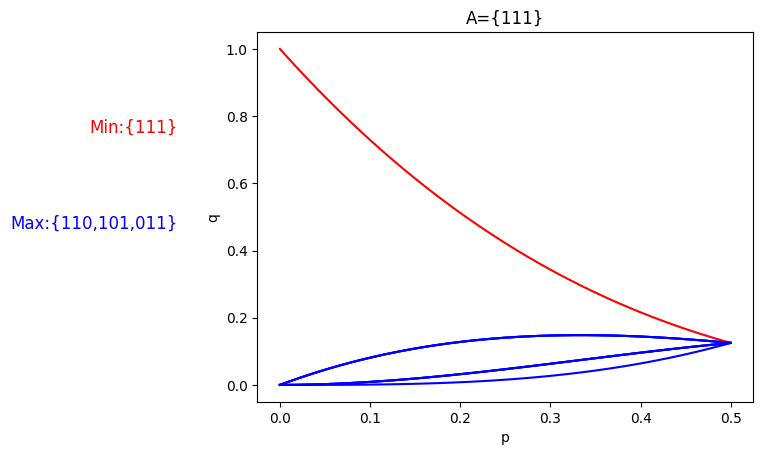

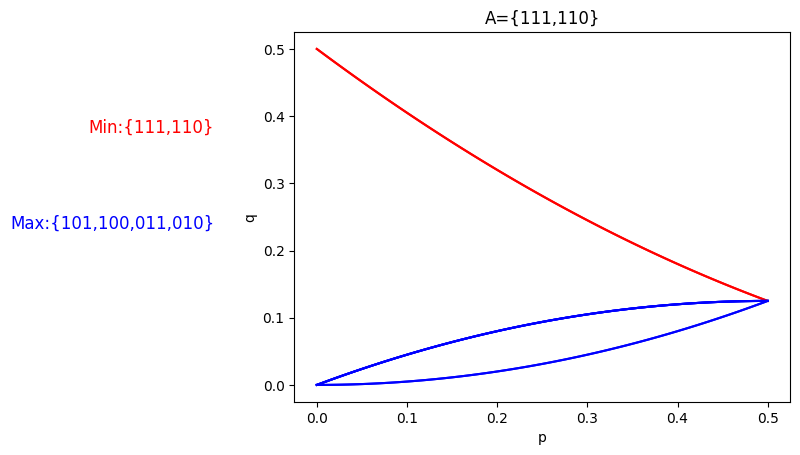

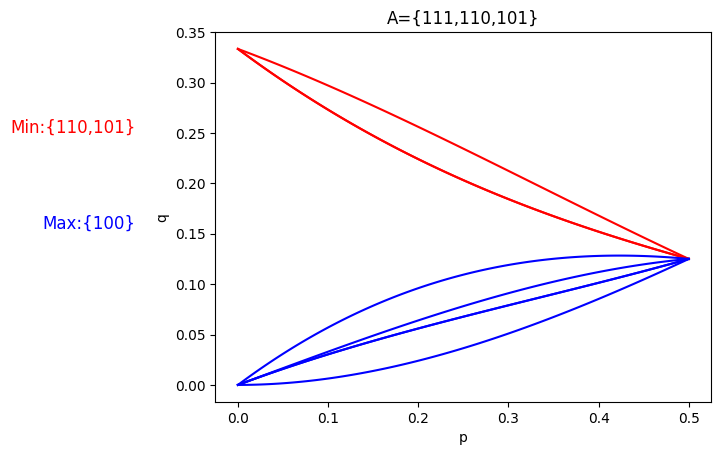

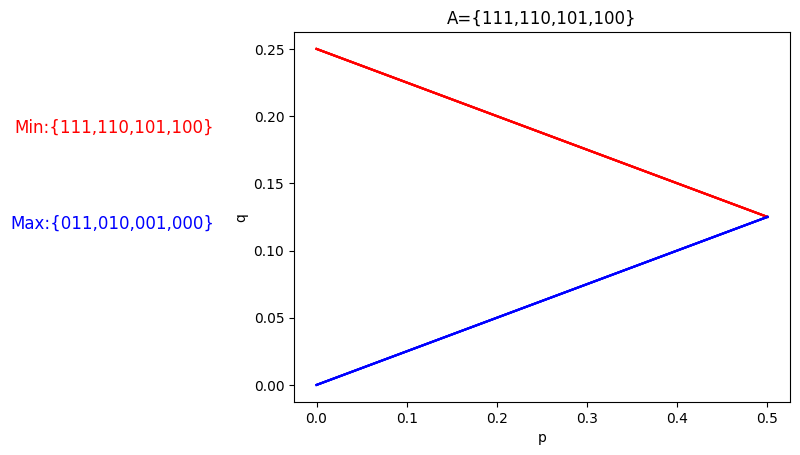

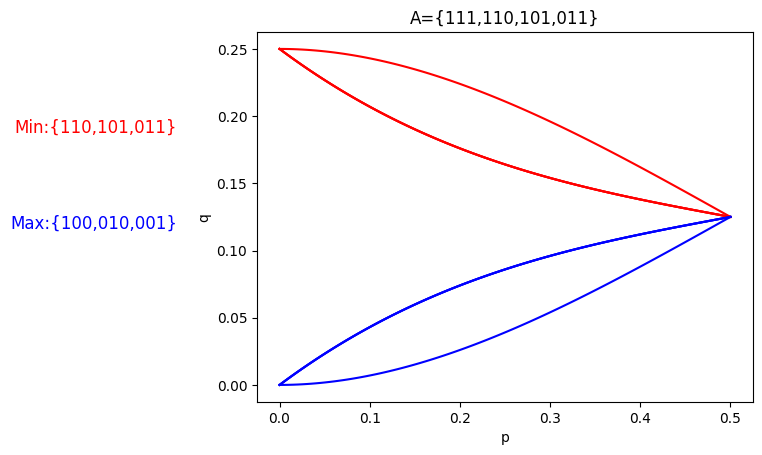

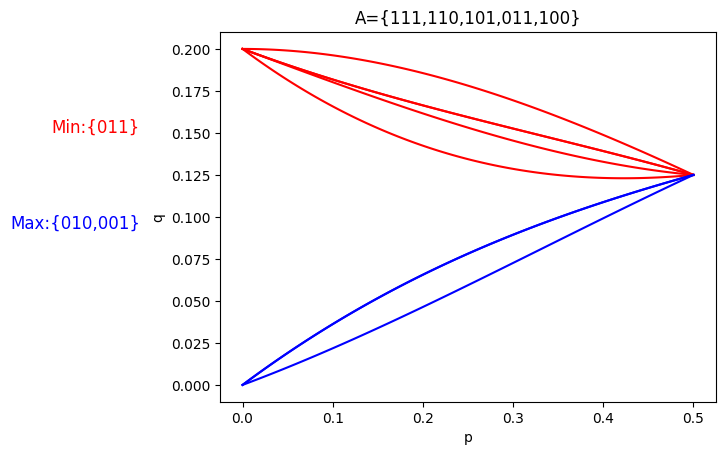

In [3]:
T=np.array([[1,1,1],[1,1,0],[1,0,1],[1,0,0],[0,1,1],[0,1,0],[0,0,1],[0,0,0]])
P = np.linspace(0, 0.5, 100)
def q_y(p,y,A):
  total=0
  for a in A:
    total+=p_y(p,y,a)
  return round(total/A.shape[0],10)
def p_y(p,y,a):
  sum=1
  for i in range(a.shape[0]):
    if y[i]==a[i]:
      sum*=(1-p)
    else:
      sum*=p
  return sum

A = [
    np.array([[1,1,1]]),
    np.array([[1,1,1],[1,1,0]]),
    np.array([[1,1,1],[1,1,0],[1,0,1]]),
    np.array([[1,1,1],[1,1,0],[1,0,1],[1,0,0]]),
    np.array([[1,1,1],[1,1,0],[1,0,1],[0,1,1]]),
    np.array([[1,1,1],[1,1,0],[1,0,1],[0,1,1],[1,0,0]]),
]
B = []
for a in A:
    s = '{'
    for i,v in enumerate(a):
        if i != 0:
          s+=','
        s += ''.join(map(str, v))
    s += '}'
    B.append(s)
for b,a in enumerate(A):
  C=[]
  D=[]
  alpha=0
  beta=1
  plt.figure()
  for i in T:
    points=[]
    for p in P:
      points.append([p,q_y(p,i,a)])
    if points[0][1]==0:#blue
      if points[50][1]>alpha:
        alpha=points[50][1]
        C.clear()
        C.append(i)
      elif points[50][1]==alpha:
        C.append(i)
    else:#red
      if points[50][1]<beta:
        beta=points[50][1]
        D.clear()
        D.append(i)
      elif points[50][1]==beta:
        D.append(i)
    is_in = any((i == row).all() for row in a)
    if is_in:
      co='red'
    else:
      co='blue'
    x_c=[point[0] for point in points]
    y_c=[point[1] for point in points]
    plt.plot(x_c,y_c,color=co)
  D_str = '{' + ','.join([''.join(map(str, arr)) for arr in D]) + '}'
  C_str = '{' + ','.join([''.join(map(str, arr)) for arr in C]) + '}'
  plt.figtext(0, 0.7, f'Min:{D_str}', ha='right', va='top', fontsize=12, color='red')
  plt.figtext(0, 0.5, f'Max:{C_str}', ha='right', va='top', fontsize=12, color='blue')
  plt.title(f'A={B[b]}')
  plt.xlabel('p')
  plt.ylabel('q')
  plt.show()

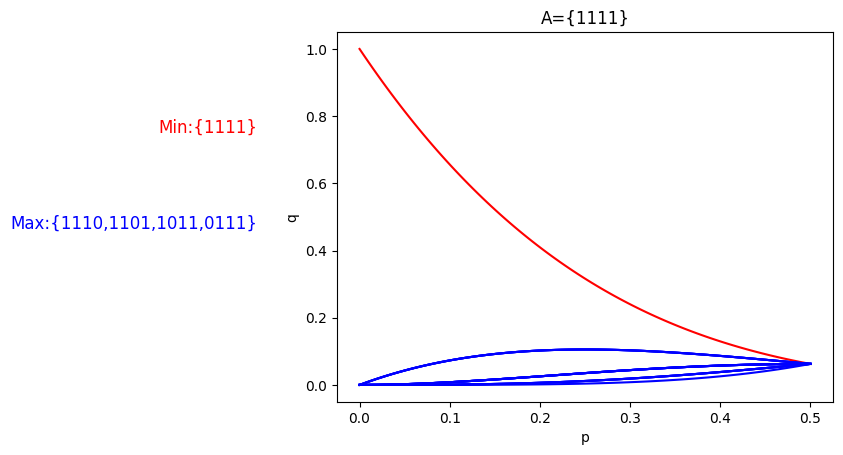

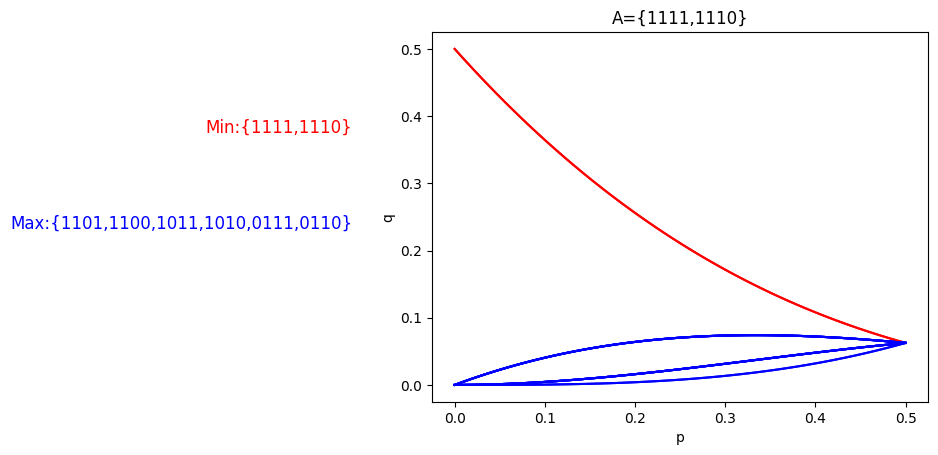

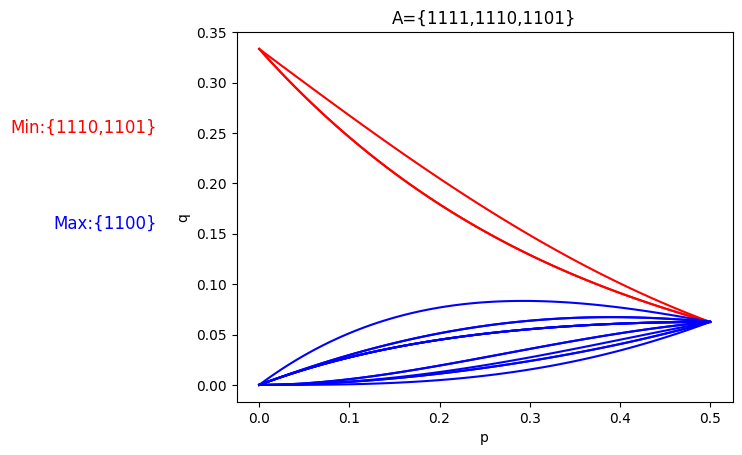

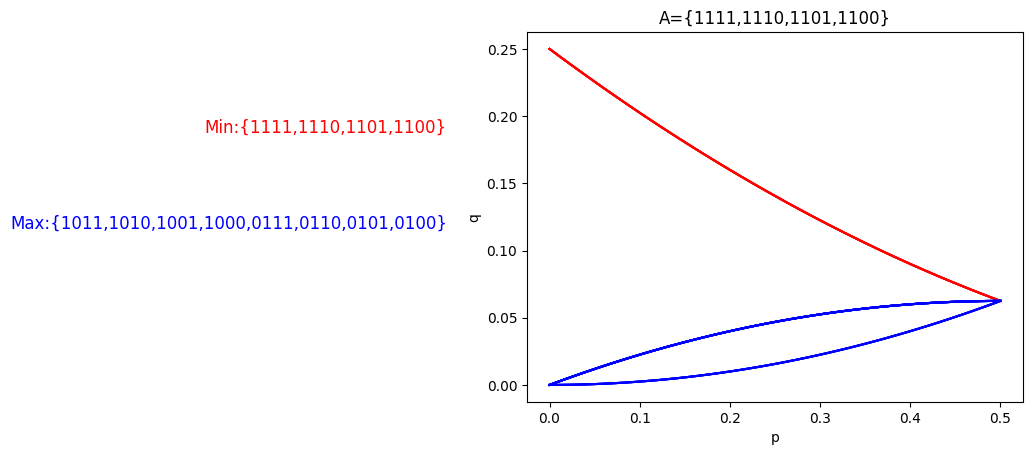

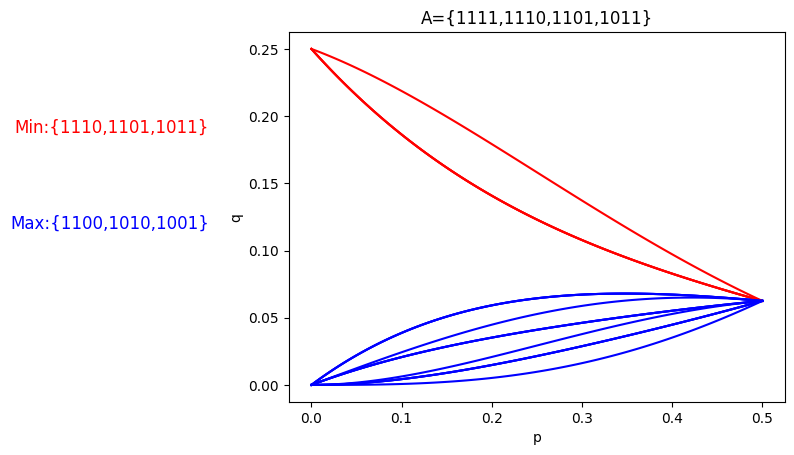

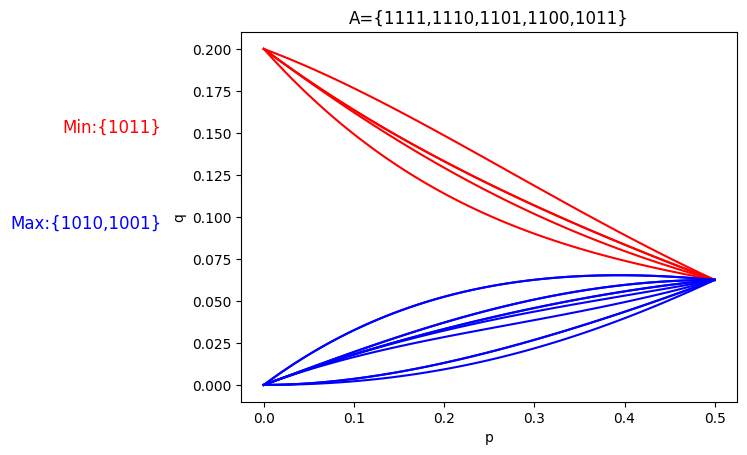

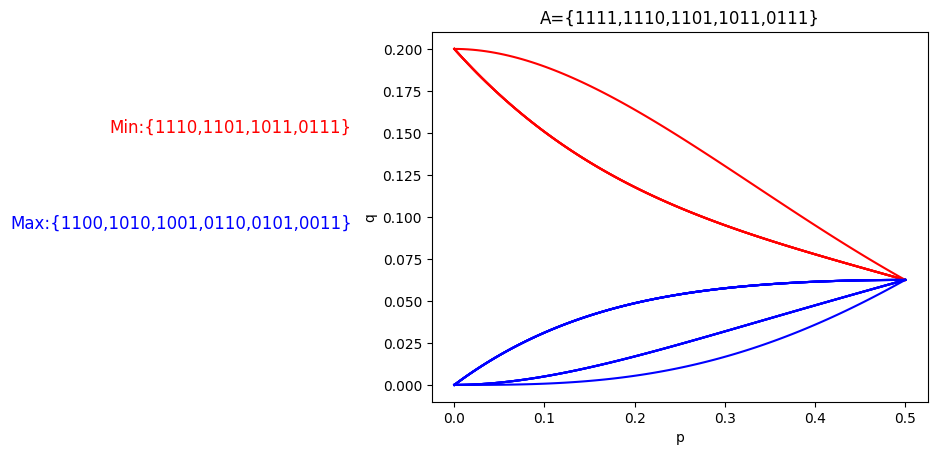

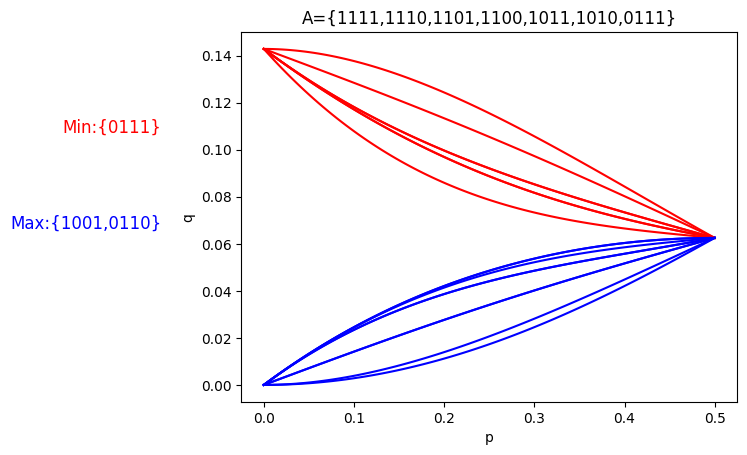

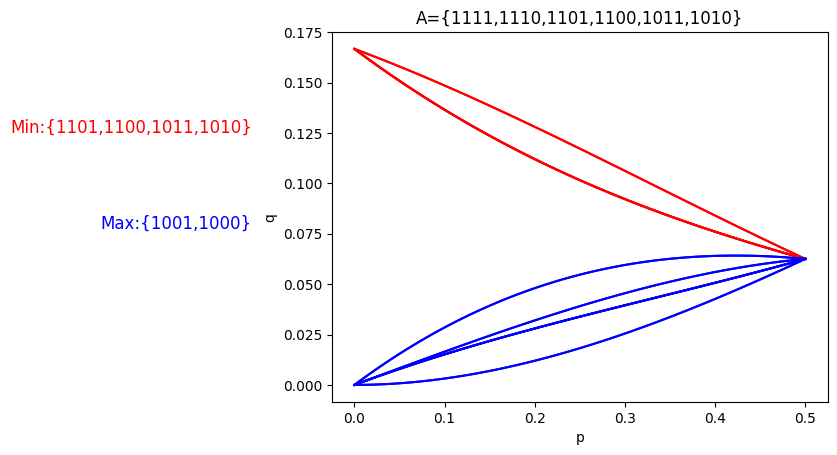

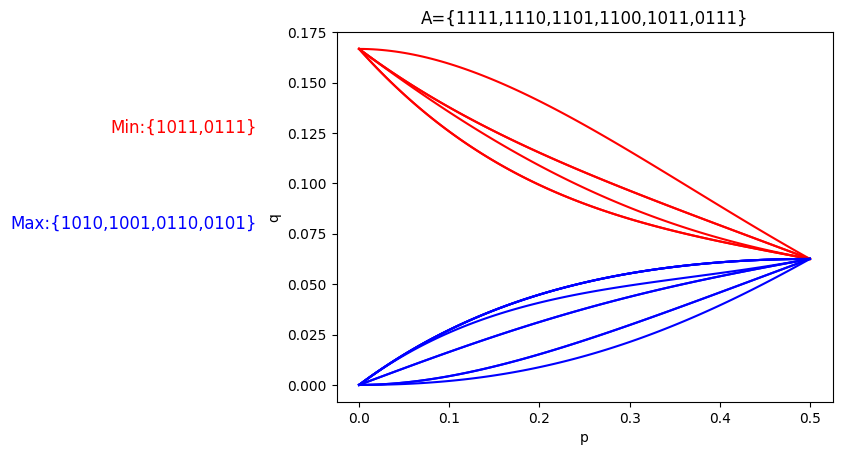

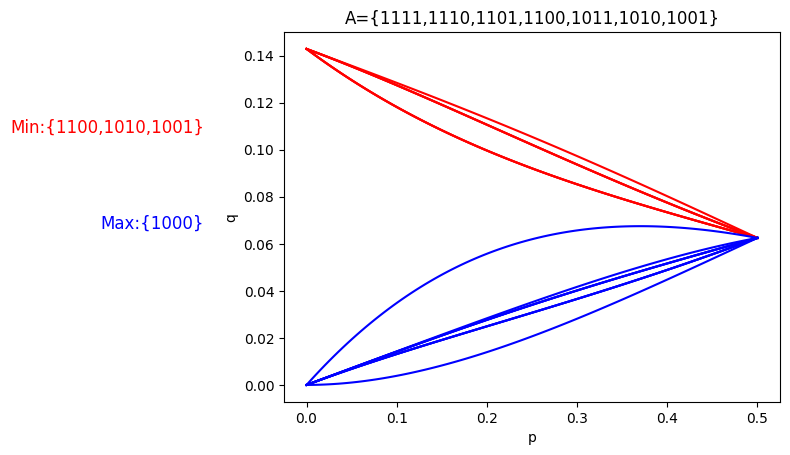

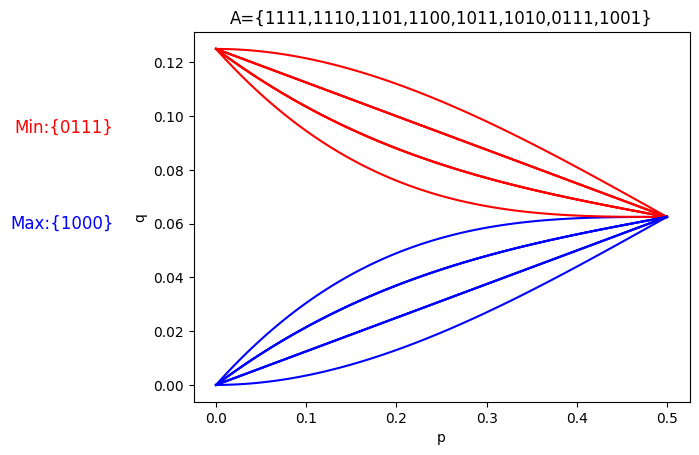

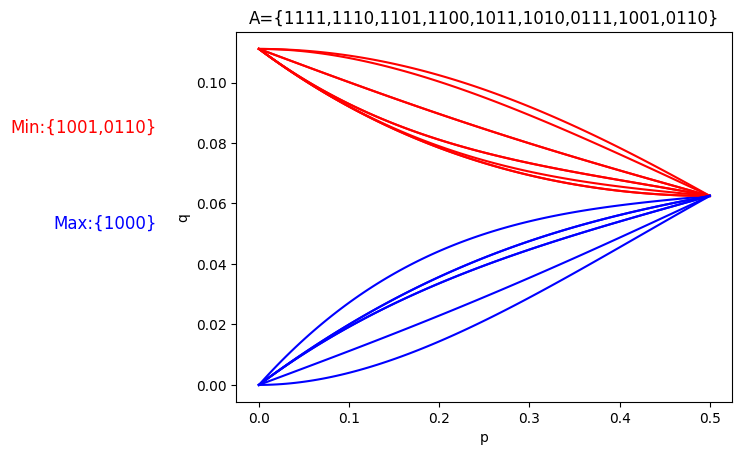

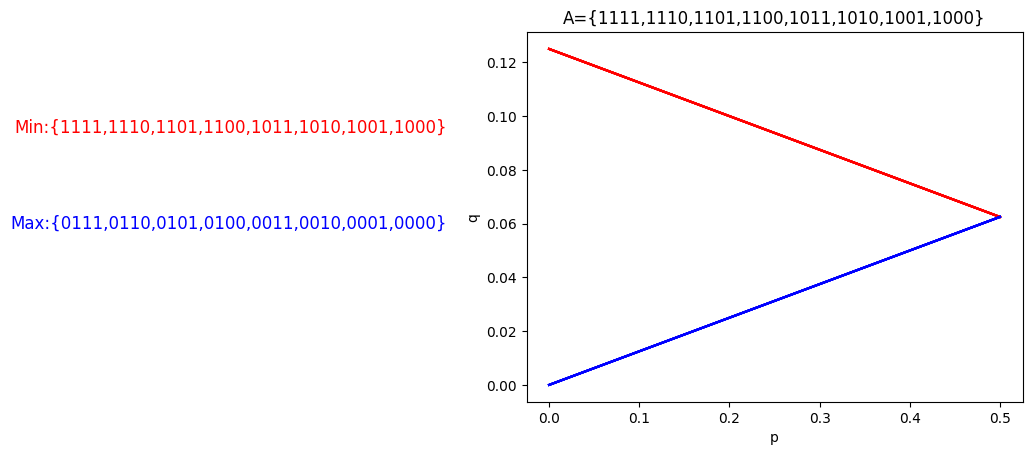

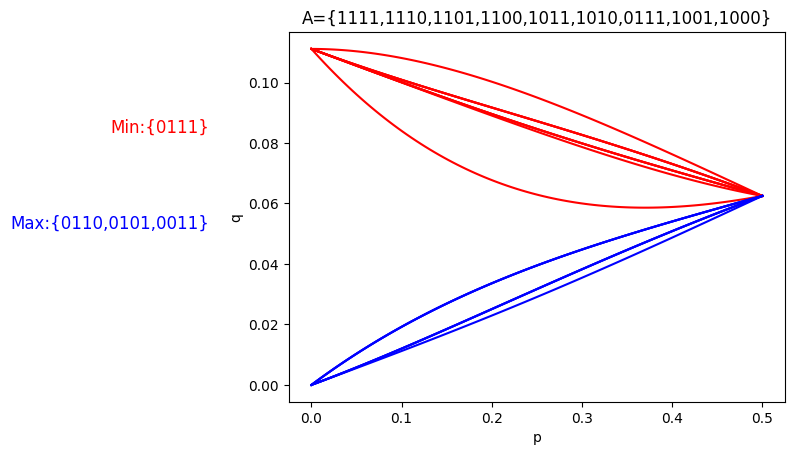

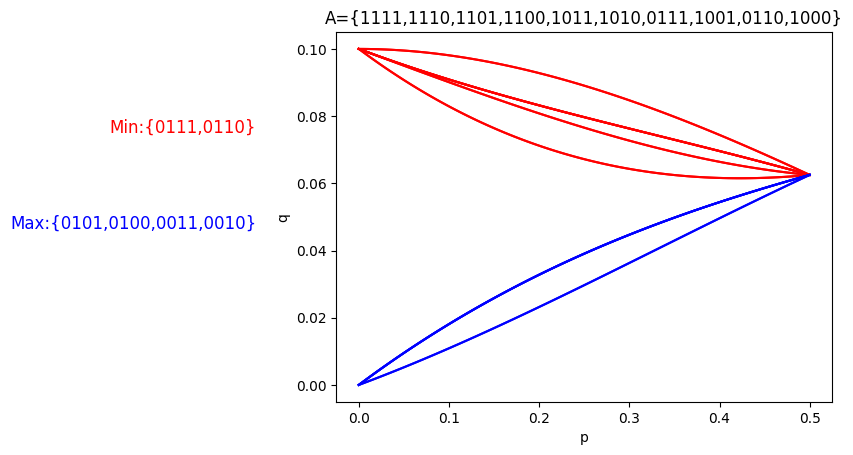

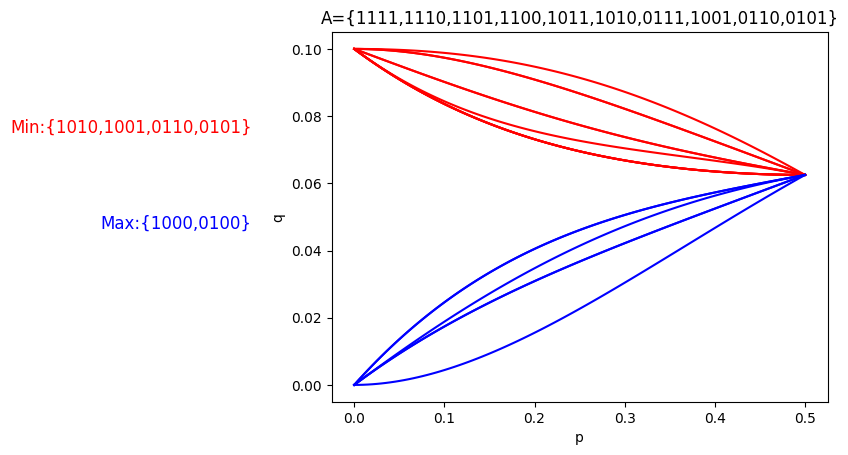

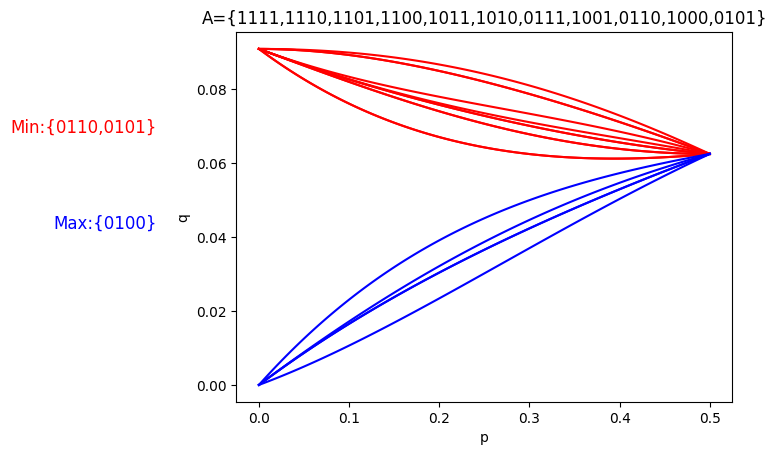

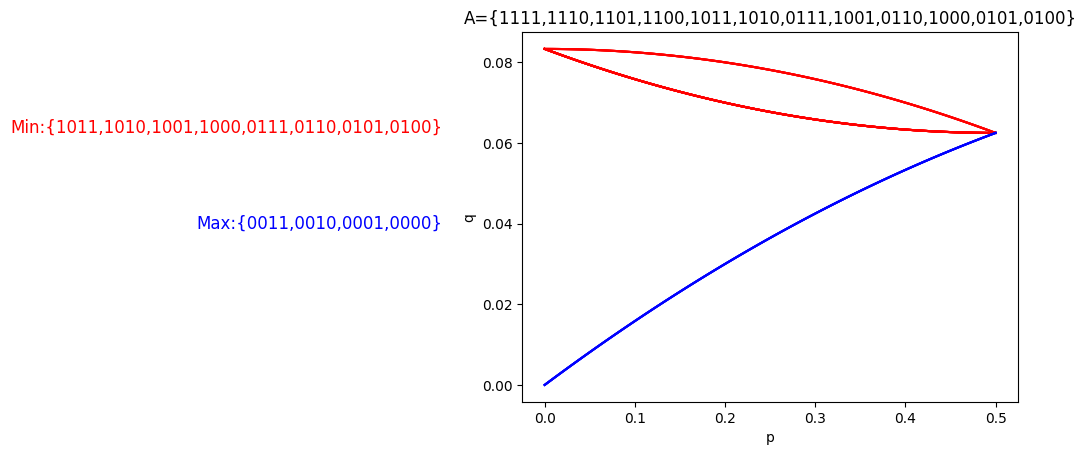

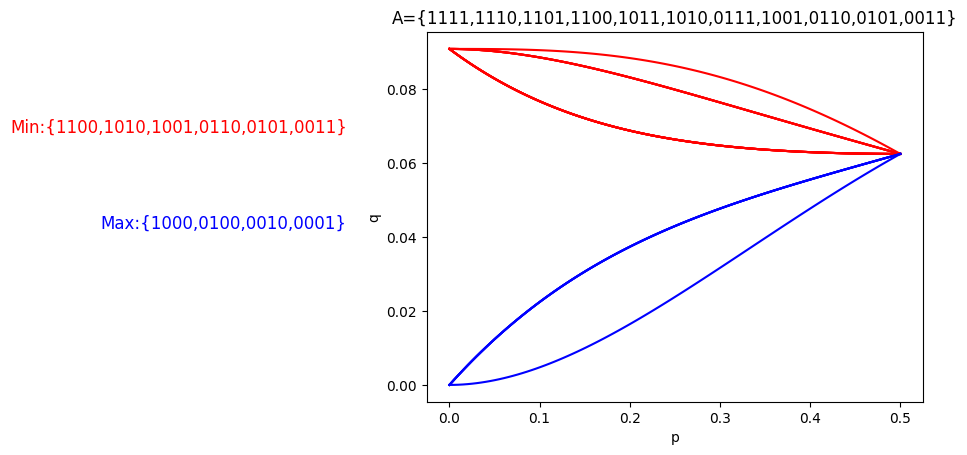

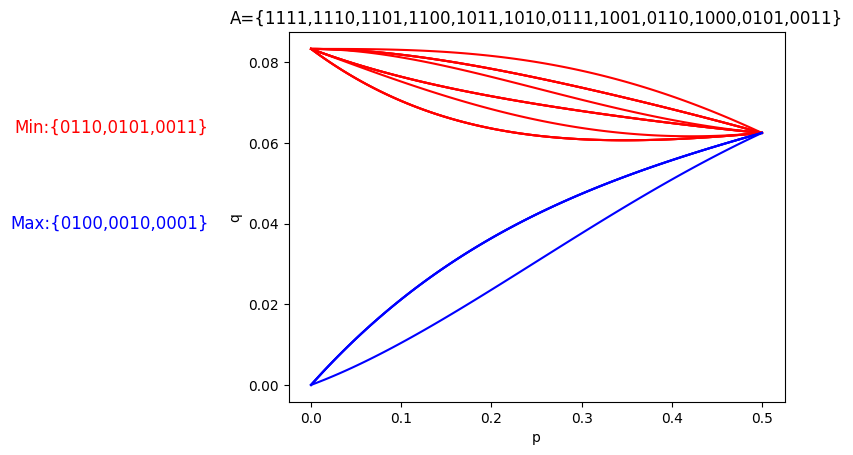

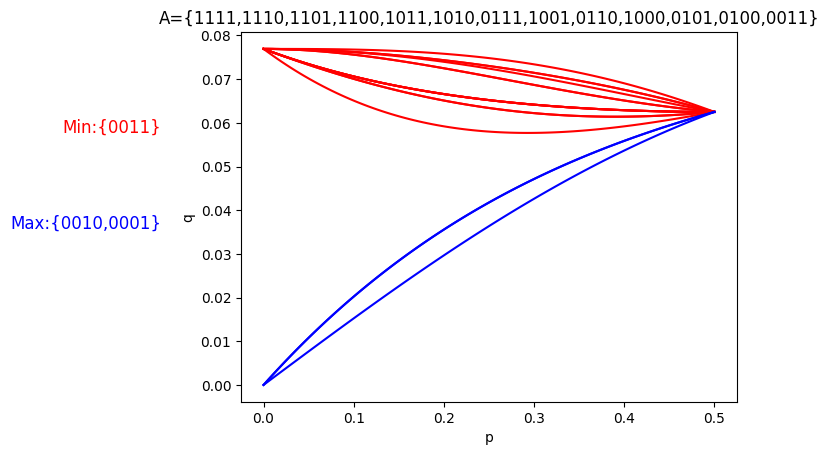

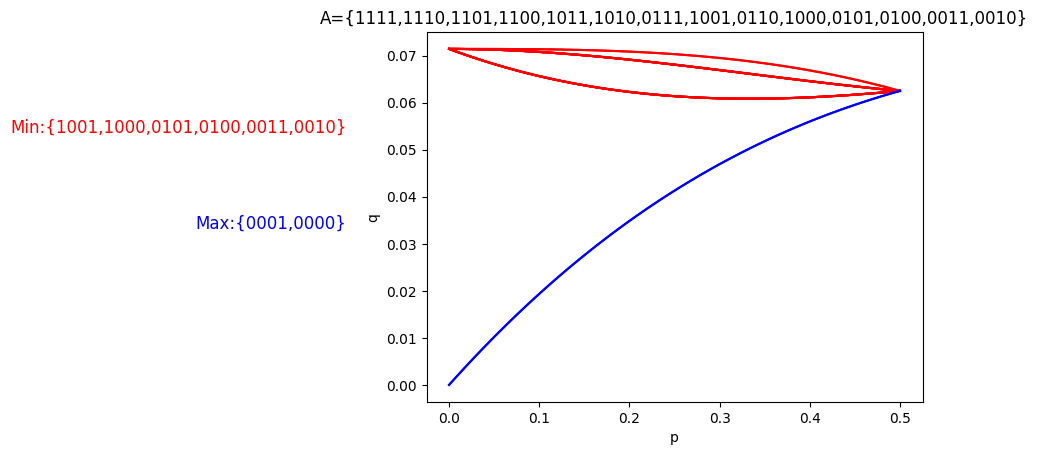

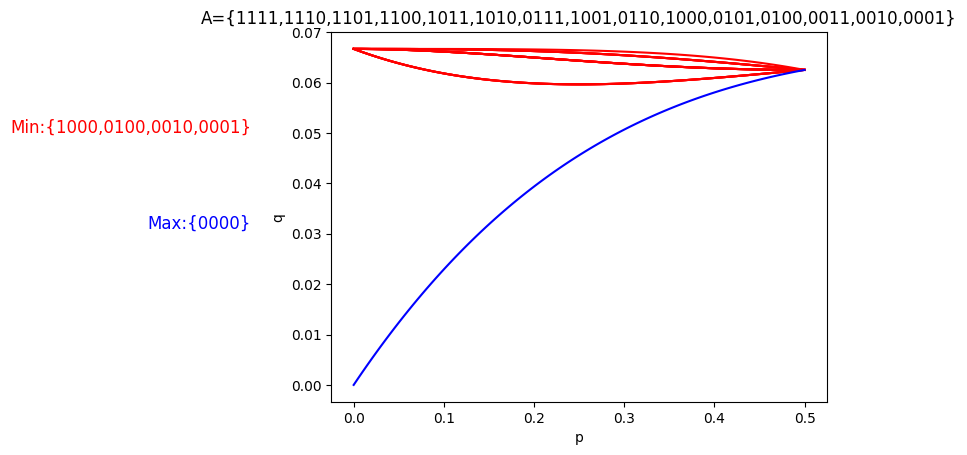

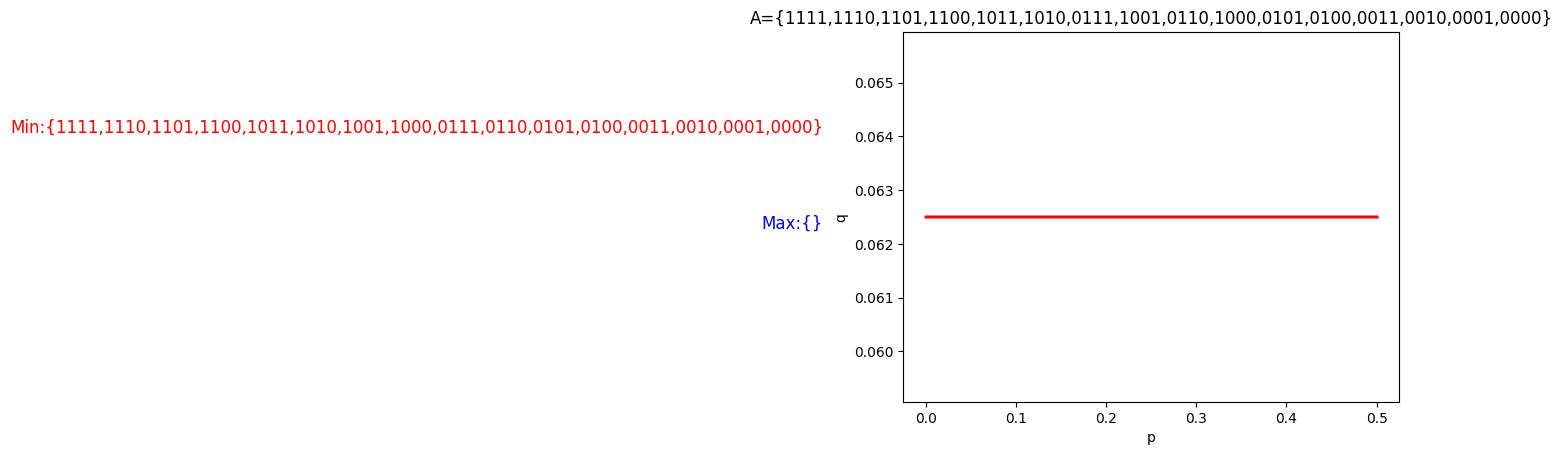

In [4]:
T = np.array([
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [1, 1, 0, 1],
    [1, 1, 0, 0],
    [1, 0, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 0],
    [0, 1, 1, 1],
    [0, 1, 1, 0],
    [0, 1, 0, 1],
    [0, 1, 0, 0],
    [0, 0, 1, 1],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 0]
])
P = np.linspace(0, 0.5, 100)
def q_y(p,y,A):
  total=0
  for a in A:
    total+=p_y(p,y,a)
  return round(total/A.shape[0],10)
def p_y(p,y,a):
  sum=1
  for i in range(a.shape[0]):
    if y[i]==a[i]:
      sum*=(1-p)
    else:
      sum*=p
  return sum

A = [
    np.array([[1,1,1,1]]),
    np.array([[1,1,1,1],[1,1,1,0]]),
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1]]),
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0]]),
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,1]]),   
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,1],[0,1,1,1]]),
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1]]),
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[0,1,1,1]]),
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[1,0,0,1]]),  
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[1,0,0,1],[1,0,0,0]]),  
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[1,0,0,0]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[1,0,0,0]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[0,1,0,1]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[1,0,0,0],[0,1,0,1]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[1,0,0,0],[0,1,0,1],[0,1,0,0]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[0,1,0,1],[0,0,1,1]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[1,0,0,0],[0,1,0,1],[0,0,1,1]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[1,0,0,0],[0,1,0,1],[0,1,0,0],[0,0,1,1]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[1,0,0,0],[0,1,0,1],[0,1,0,0],[0,0,1,1],[0,0,1,0]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[1,0,0,0],[0,1,0,1],[0,1,0,0],[0,0,1,1],[0,0,1,0],[0,0,0,1]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[1,0,0,0],[0,1,0,1],[0,1,0,0],[0,0,1,1],[0,0,1,0],[0,0,0,1],[0,0,0,0]])
]
B = []
for a in A:
    s = '{'
    for i,v in enumerate(a):
        if i != 0:
          s+=','
        s += ''.join(map(str, v))
    s += '}'
    B.append(s)
for b,a in enumerate(A):
  C=[]
  D=[]
  alpha=0
  beta=1
  plt.figure()
  for i in T:
    points=[]
    for p in P:
      points.append([p,q_y(p,i,a)])
    if points[0][1]==0:#blue
      if points[50][1]>alpha:
        alpha=points[50][1]
        C.clear()
        C.append(i)
      elif points[50][1]==alpha:
        C.append(i)
    else:#red
      if points[50][1]<beta:
        beta=points[50][1]
        D.clear()
        D.append(i)
      elif points[50][1]==beta:
        D.append(i)
    is_in = any((i == row).all() for row in a)
    if is_in:
      co='red'
    else:
      co='blue'
    x_c=[point[0] for point in points]
    y_c=[point[1] for point in points]
    plt.plot(x_c,y_c,color=co)
  D_str = '{' + ','.join([''.join(map(str, arr)) for arr in D]) + '}'
  C_str = '{' + ','.join([''.join(map(str, arr)) for arr in C]) + '}'
  plt.figtext(0, 0.7, f'Min:{D_str}', ha='right', va='top', fontsize=12, color='red')
  plt.figtext(0, 0.5, f'Max:{C_str}', ha='right', va='top', fontsize=12, color='blue')
  plt.title(f'A={B[b]}')
  plt.xlabel('p')
  plt.ylabel('q')
  plt.show()